# Jonathan Halverson
# Friday, September 29, 2017
# Geron: Chapter 3 on Classification

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

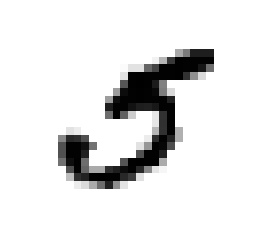

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')

In [8]:
y[36000]

5.0

The data is already divided into a train and test set (at record 60000):

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
import numpy as np

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a binary classifier

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

(array([  980.,  1135.,  1032.,  1010.,   982.,   892.,   958.,  1028.,
          974.,  1009.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

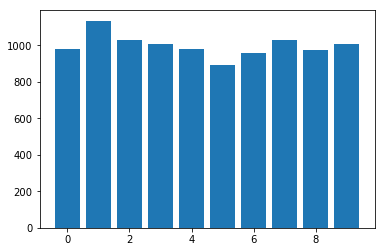

In [13]:
plt.hist(y_test, bins=np.linspace(-0.5, 9.5, 11), rwidth=0.8)

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
# Defaults to ‘hinge’, which gives a linear SVM
model = SGDClassifier(random_state=42)
model = model.fit(X_train, y_train_5)
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_pred, y_test_5)

0.96619999999999995

We see that the accuracy appears high. It is important to note that only 10% of the targets are fives so accuracy is not the best metric.

In [18]:
model.predict([X[36000]])

array([ True], dtype=bool)

In [19]:
# For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass,
# StratifiedKFold is used. In all other cases, KFold is used.
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(random_state=42), X_train, y_train_5, cv=5, scoring='accuracy')

array([ 0.96608616,  0.94891667,  0.9545    ,  0.95541667,  0.96458038])

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SGDClassifier(random_state=42), X_train, y_train_5, cv=5)

In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53413,  1166],
       [ 1360,  4061]])

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)

0.77692749186914101

In [28]:
recall_score(y_train_5, y_train_pred)

0.74912377790075635

In [31]:
f1_score(y_train_5, y_train_pred)

0.76277235161532686